<a href="https://colab.research.google.com/github/25it111-afk/CODSOFT/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning Done!


/tmp/ipython-input-1302588893.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
/tmp/ipython-input-1302588893.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

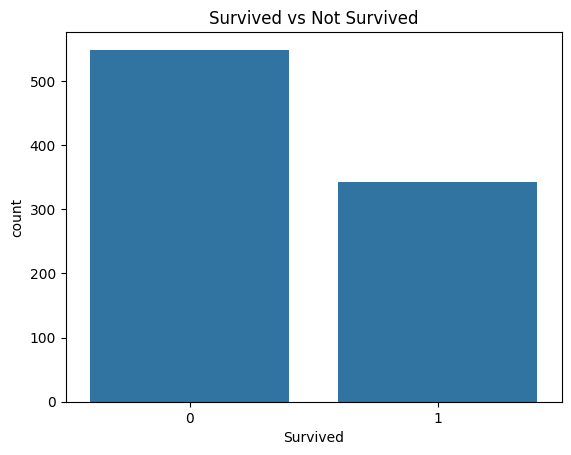

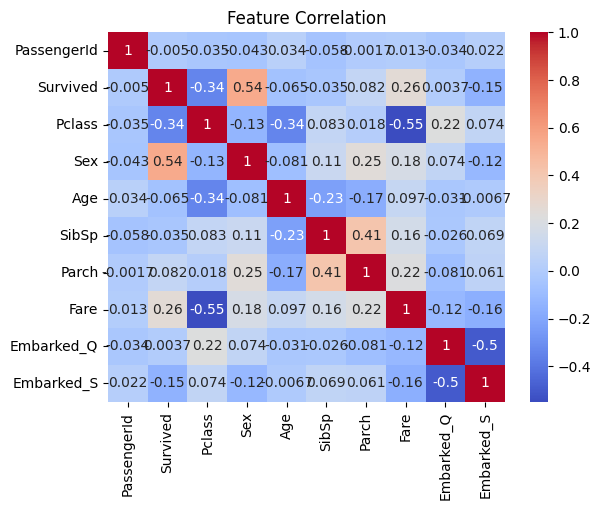

Model Trained Successfully!
Accuracy: 80.45%
Confusion Matrix:
 [[89 16]
 [19 55]]

Feature Coefficients:
        Feature  Coefficient
2          Sex     2.607892
6         Fare     0.002625
0  PassengerId     0.000354
3          Age    -0.030517
7   Embarked_Q    -0.118576
5        Parch    -0.118941
4        SibSp    -0.287187
8   Embarked_S    -0.402059
1       Pclass    -0.931802


In [1]:
# ✅ TITANIC SURVIVAL PREDICTION - FULL BEGINNER FRIENDLY

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 2️⃣ Load Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)
print("Dataset Loaded Successfully!")
display(titanic.head())

# 3️⃣ Quick Data Cleaning
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
print("Data Cleaning Done!")

# 4️⃣ Explore Data (Optional but good for video)
sns.countplot(x='Survived', data=titanic)
plt.title("Survived vs Not Survived")
plt.show()

sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# 5️⃣ Prepare Features & Labels
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model Trained Successfully!")

# 7️⃣ Predict & Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:\n", cm)

# 8️⃣ Feature Importance (Optional for Video)
coeff = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nFeature Coefficients:\n", coeff.sort_values(by='Coefficient', ascending=False))
